In [56]:
import os
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
import kaggle
import kagglehub
from kagglehub import KaggleDatasetAdapter
import math

In [53]:
# Download the dataset from Kaggle
# This will download the dataset to a local cache directory
dataset_path = kagglehub.dataset_download("pratyushpuri/wearable-health-devices-performance-analysis")

print(f"Dataset downloaded to: {dataset_path}")

# List files in the downloaded dataset
csv_file = os.listdir(dataset_path)[0]
print(csv_file)

df = pd.read_csv(os.path.join(dataset_path, csv_file))
display(df.columns)
display(df.head())


Dataset downloaded to: /Users/jordan/.cache/kagglehub/datasets/pratyushpuri/wearable-health-devices-performance-analysis/versions/1
wearable_health_devices_performance_upto_26june2025.csv


Index(['Test_Date', 'Device_Name', 'Brand', 'Model', 'Category', 'Price_USD',
       'Battery_Life_Hours', 'Heart_Rate_Accuracy_Percent',
       'Step_Count_Accuracy_Percent', 'Sleep_Tracking_Accuracy_Percent',
       'Water_Resistance_Rating', 'User_Satisfaction_Rating',
       'GPS_Accuracy_Meters', 'Connectivity_Features', 'Health_Sensors_Count',
       'App_Ecosystem_Support', 'Performance_Score'],
      dtype='object')

,Test_Date,Device_Name,Brand,Model,Category,Price_USD,Battery_Life_Hours,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,Water_Resistance_Rating,User_Satisfaction_Rating,GPS_Accuracy_Meters,Connectivity_Features,Health_Sensors_Count,App_Ecosystem_Support,Performance_Score
0,2025-06-01,Fitbit Inspire 4,Fitbit,Inspire 4,Fitness Tracker,141.74,129.9,89.69,93.03,78.91,3ATM,6.5,NaN,"Bluetooth, WiFi",5,Cross-platform,68.4
1,2025-06-01,Apple Watch SE 3,Apple,Watch SE 3,Smartwatch,834.64,26.5,95.92,98.20,79.76,IP68,8.3,4.9,"WiFi, Bluetooth, NFC",8,iOS,60.1
2,2025-06-01,Fitbit Versa 4,Fitbit,Versa 4,Sports Watch,145.34,161.2,92.24,96.81,74.49,IPX8,6.0,1.7,Bluetooth,7,Cross-platform,59.3
3,2025-06-01,Polar Vantage V3,Polar,Vantage V3,Smartwatch,349.53,69.4,96.77,95.56,78.06,IP68,8.0,3.2,"WiFi, Bluetooth, NFC, LTE",12,Cross-platform,61.0
4,2025-06-01,Samsung Galaxy Watch FE,Samsung,Galaxy Watch FE,Smartwatch,502.43,39.7,92.27,98.15,75.23,IPX8,8.3,1.6,"WiFi, Bluetooth, NFC, LTE",14,Android/iOS,61.2


In [54]:
# Basic EDA
print("Description of the dataset: ")
display(df.describe())
print("Number of missing values in the dataset: ")
display(df.isnull().sum())
print("Number of duplicated values in the dataset: ")
display(df.duplicated().sum())
print("Number of unique values in the dataset: ")
display(df.nunique())
print("Shape of the dataset: ") 
display(df.shape)
print("Columns in the dataset: ")
display(df.columns.tolist())


Description of the dataset: 


,Price_USD,Battery_Life_Hours,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,User_Satisfaction_Rating,GPS_Accuracy_Meters,Health_Sensors_Count,Performance_Score
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,1743.000000,2375.000000,2375.000000
mean,359.444484,160.584463,93.483907,95.910198,78.837516,7.966484,3.247676,8.912842,64.047621
std,215.671035,234.815896,3.172078,1.665484,4.843714,0.831801,1.022825,3.559990,5.109075
min,30.000000,18.000000,85.010000,93.000000,70.000000,6.000000,1.500000,2.000000,55.100000
25%,211.875000,46.900000,92.140000,94.550000,75.610000,7.400000,2.400000,6.000000,60.400000
50%,334.370000,99.800000,94.070000,95.950000,78.300000,8.000000,3.200000,9.000000,62.200000
75%,487.930000,177.400000,95.925000,96.960000,81.930000,8.500000,4.100000,12.000000,67.700000
max,989.480000,2118.100000,98.000000,99.500000,91.970000,9.500000,5.000000,15.000000,78.300000


Number of missing values in the dataset: 


Test_Date                            0
Device_Name                          0
Brand                                0
Model                                0
Category                             0
Price_USD                            0
Battery_Life_Hours                   0
Heart_Rate_Accuracy_Percent          0
Step_Count_Accuracy_Percent          0
Sleep_Tracking_Accuracy_Percent      0
Water_Resistance_Rating              0
User_Satisfaction_Rating             0
GPS_Accuracy_Meters                632
Connectivity_Features                0
Health_Sensors_Count                 0
App_Ecosystem_Support                0
Performance_Score                    0
dtype: int64

Number of duplicated values in the dataset: 


np.int64(0)

Number of unique values in the dataset: 


Test_Date                            25
Device_Name                          29
Brand                                10
Model                                29
Category                              5
Price_USD                          2111
Battery_Life_Hours                 1436
Heart_Rate_Accuracy_Percent         952
Step_Count_Accuracy_Percent         621
Sleep_Tracking_Accuracy_Percent    1291
Water_Resistance_Rating               7
User_Satisfaction_Rating             36
GPS_Accuracy_Meters                  36
Connectivity_Features                 4
Health_Sensors_Count                 14
App_Ecosystem_Support                 3
Performance_Score                   218
dtype: int64

Shape of the dataset: 


(2375, 17)

Columns in the dataset: 


['Test_Date',
 'Device_Name',
 'Brand',
 'Model',
 'Category',
 'Price_USD',
 'Battery_Life_Hours',
 'Heart_Rate_Accuracy_Percent',
 'Step_Count_Accuracy_Percent',
 'Sleep_Tracking_Accuracy_Percent',
 'Water_Resistance_Rating',
 'User_Satisfaction_Rating',
 'GPS_Accuracy_Meters',
 'Connectivity_Features',
 'Health_Sensors_Count',
 'App_Ecosystem_Support',
 'Performance_Score']

,Device_Name,Battery_Life_Hours,Price_USD,Performance_Score,User_Satisfaction_Rating,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,GPS_Accuracy_Meters
0,Fitbit Inspire 4,129.9,141.74,68.4,6.5,89.69,93.03,78.91,NaN
1,Apple Watch SE 3,26.5,834.64,60.1,8.3,95.92,98.20,79.76,4.9
2,Fitbit Versa 4,161.2,145.34,59.3,6.0,92.24,96.81,74.49,1.7
3,Polar Vantage V3,69.4,349.53,61.0,8.0,96.77,95.56,78.06,3.2
4,Samsung Galaxy Watch FE,39.7,502.43,61.2,8.3,92.27,98.15,75.23,1.6
...,...,...,...,...,...,...,...,...,...
2370,Apple Watch Series 10,29.3,582.28,62.8,9.3,95.50,96.02,82.02,3.3
2371,Fitbit Charge 6,108.4,156.48,67.9,6.8,89.27,94.34,75.00,NaN
2372,Apple Watch SE 3,64.6,282.45,60.9,7.3,96.69,98.34,79.44,2.5
2373,Apple Watch Ultra 2,42.6,724.99,61.6,8.4,95.46,97.09,78.99,2.8


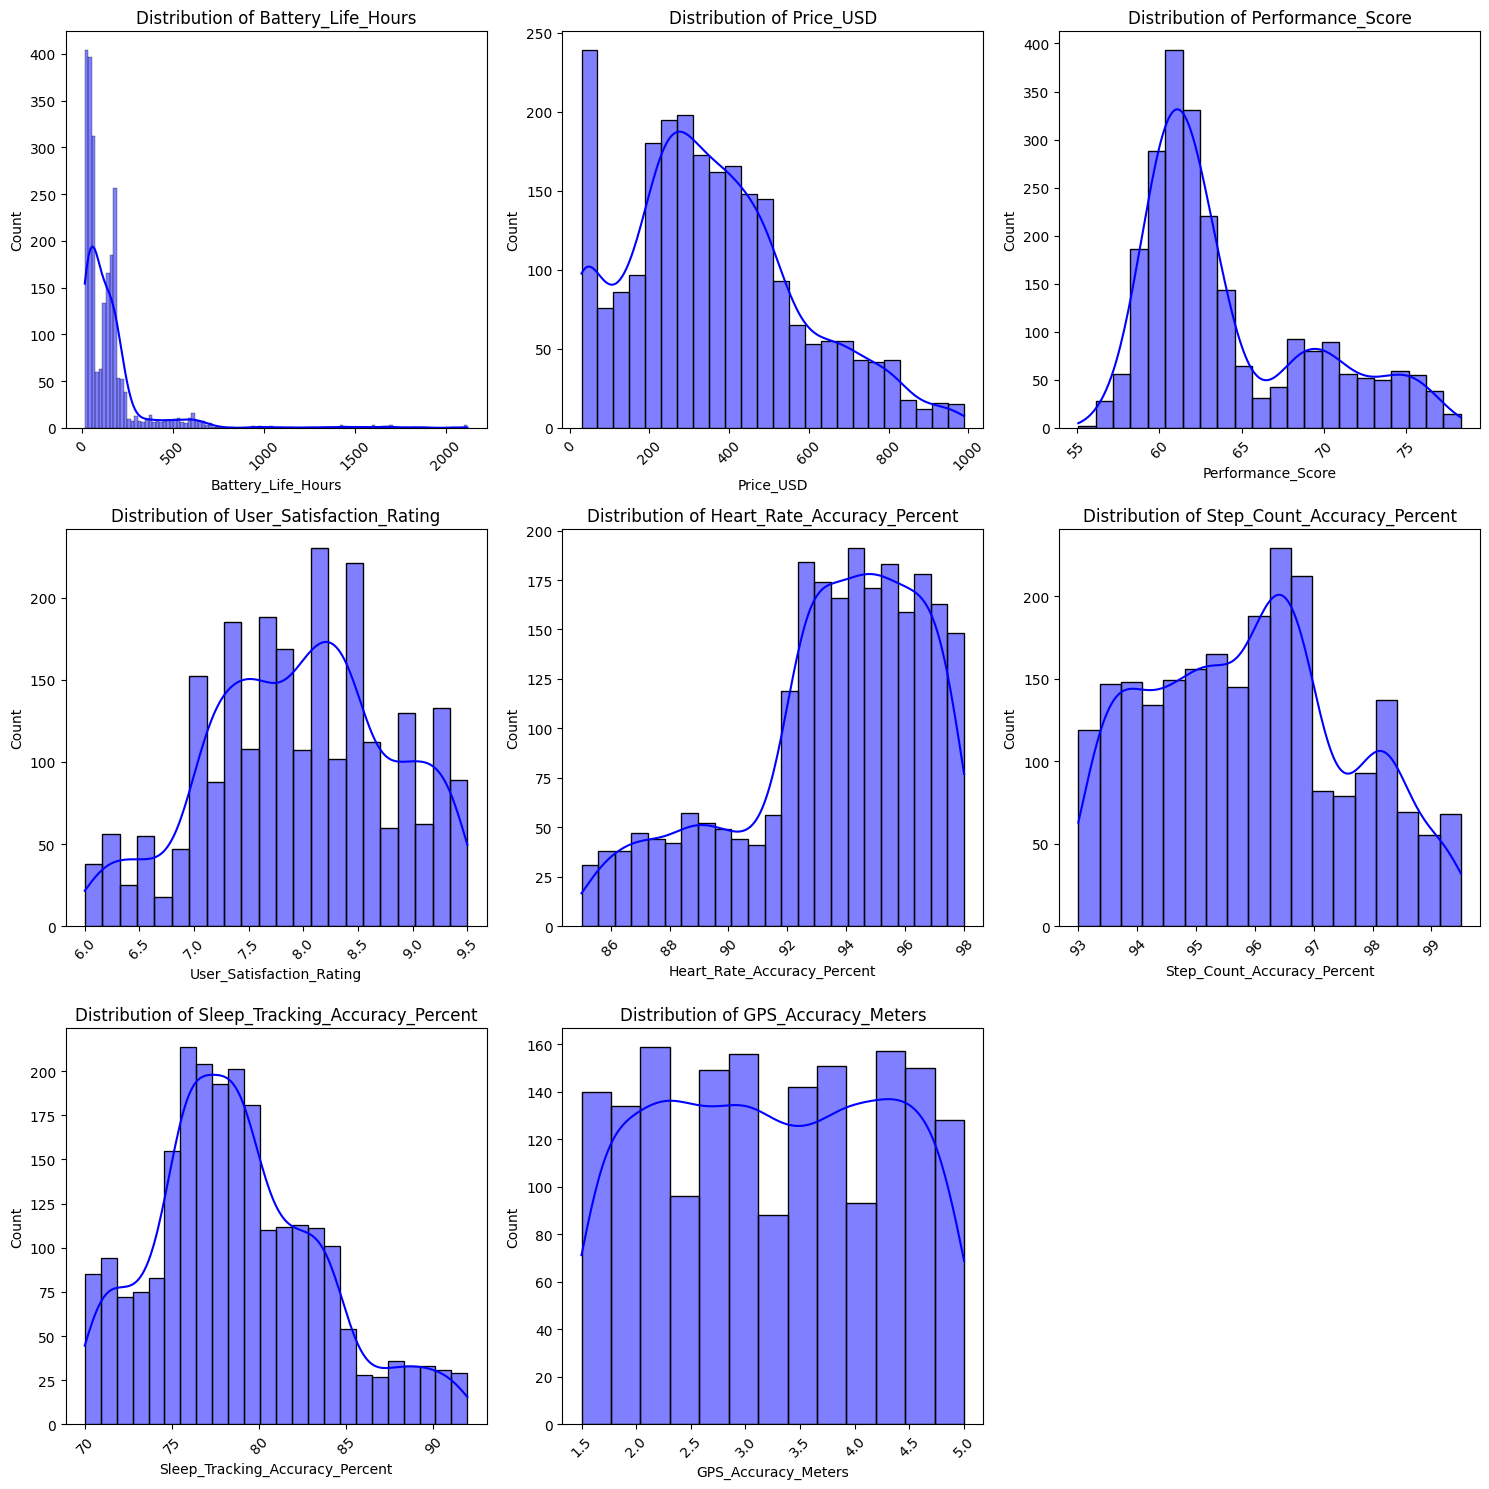

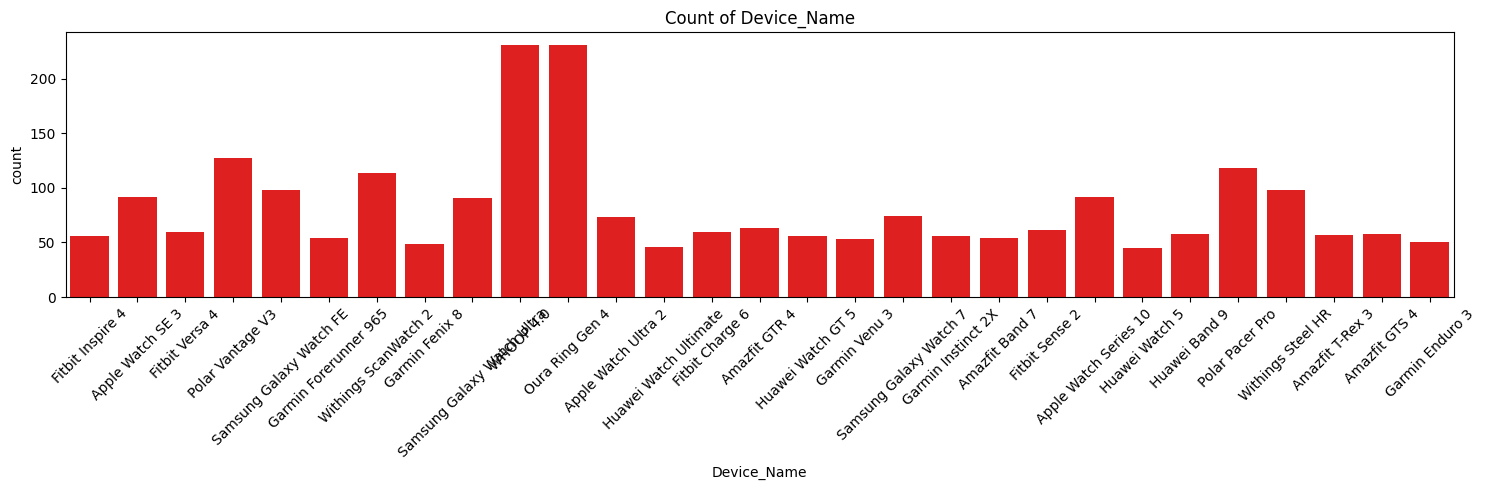

In [88]:
# Plot the distribution of the target variables 
# TODO: Add accuracy metrics & plot the distribution of the target variables 
accuracy_metrics = [value for value in df.columns.tolist() if "Accuracy" in value] 
target_variables = ['Device_Name', 'Battery_Life_Hours', 'Price_USD', 'Performance_Score', 'User_Satisfaction_Rating']
target_variables.extend(accuracy_metrics)

# Convert variables to their respective types
target_df = df[target_variables]
target_variables = target_df.columns.tolist()
display(target_df)
# print(target_df['Battery_Life_Hours'].dtype)
# 1. Plot the distribution/count of target variables (either using histogram or barplot)
numerical_vars = [variable for variable in target_variables if np.issubdtype(target_df[variable].dtype, np.number)]
categorical_vars = [variable for variable in target_variables if variable not in numerical_vars]
# Calculate the number of subplots needed
num_numeric_vars = len(numerical_vars)

# Determine nrows and ncols for the grid
n_numeric_cols = math.ceil(math.sqrt(num_numeric_vars))  # Number of columns
n_numeric_rows = math.ceil(num_numeric_vars / n_numeric_cols) # Number of rows

num_cat_vars = len(categorical_vars)

# Determine nrows and ncols for the grid
n_cat_cols = math.ceil(math.sqrt(num_cat_vars))  # Number of columns
n_cat_rows = math.ceil(num_cat_vars / n_cat_cols) # Number of rows


# Plot Numerical
fig, axes = plt.subplots(n_numeric_rows, n_numeric_cols, figsize=(15, 5*n_numeric_rows))
# Ensure axes is always iterable
if isinstance(axes, np.ndarray):  # If axes is an array (multiple subplots)
    axes = axes.flatten()
else:  # If axes is a single Axes object (one subplot)
    axes = [axes]  # Wrap it in a list
    
for i, variable in enumerate(numerical_vars):
    ax = axes[i] # grab the current row in the axes
    sns.histplot(data=target_df, x=variable, color='blue', kde=True, ax=ax)
    ax.set_title('Distribution of ' + variable)
    ax.set_xlabel(variable)
    ax.tick_params(axis='x', rotation=45) 
  

# Hide the unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Plot categorical
fig, axes = plt.subplots(n_cat_rows, n_cat_cols, figsize=(15, 5*n_cat_rows))

# Ensure axes is always iterable
if isinstance(axes, np.ndarray):  # If axes is an array (multiple subplots)
    axes = axes.flatten()
else:  # If axes is a single Axes object (one subplot)
    axes = [axes]  # Wrap it in a list

for i, variable in enumerate(categorical_vars):
    ax = axes[i] # set the current axis
    sns.countplot(data=target_df, x=variable, color='red', ax=ax)
    ax.set_title('Count of ' + variable)
    ax.set_xlabel(variable)
    ax.tick_params(axis='x', rotation=45) 

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()



# TODO: Plot battery health against other variables (i.e., performance score and user satisfaction rating)




BASIC DATASET INFORMATION

Dataset Shape: (2375, 17)
Number of rows: 2,375
Number of columns: 17

Column Names and Data Types:
Test_Date                           object
Device_Name                         object
Brand                               object
Model                               object
Category                            object
Price_USD                          float64
Battery_Life_Hours                 float64
Heart_Rate_Accuracy_Percent        float64
Step_Count_Accuracy_Percent        float64
Sleep_Tracking_Accuracy_Percent    float64
Water_Resistance_Rating             object
User_Satisfaction_Rating           float64
GPS_Accuracy_Meters                float64
Connectivity_Features               object
Health_Sensors_Count                 int64
App_Ecosystem_Support               object
Performance_Score                  float64
dtype: object

First 5 rows:


,Test_Date,Device_Name,Brand,Model,Category,Price_USD,Battery_Life_Hours,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,Water_Resistance_Rating,User_Satisfaction_Rating,GPS_Accuracy_Meters,Connectivity_Features,Health_Sensors_Count,App_Ecosystem_Support,Performance_Score
0,2025-06-01,Fitbit Inspire 4,Fitbit,Inspire 4,Fitness Tracker,141.74,129.9,89.69,93.03,78.91,3ATM,6.5,NaN,"Bluetooth, WiFi",5,Cross-platform,68.4
1,2025-06-01,Apple Watch SE 3,Apple,Watch SE 3,Smartwatch,834.64,26.5,95.92,98.20,79.76,IP68,8.3,4.9,"WiFi, Bluetooth, NFC",8,iOS,60.1
2,2025-06-01,Fitbit Versa 4,Fitbit,Versa 4,Sports Watch,145.34,161.2,92.24,96.81,74.49,IPX8,6.0,1.7,Bluetooth,7,Cross-platform,59.3
3,2025-06-01,Polar Vantage V3,Polar,Vantage V3,Smartwatch,349.53,69.4,96.77,95.56,78.06,IP68,8.0,3.2,"WiFi, Bluetooth, NFC, LTE",12,Cross-platform,61.0
4,2025-06-01,Samsung Galaxy Watch FE,Samsung,Galaxy Watch FE,Smartwatch,502.43,39.7,92.27,98.15,75.23,IPX8,8.3,1.6,"WiFi, Bluetooth, NFC, LTE",14,Android/iOS,61.2



Last 5 rows:


,Test_Date,Device_Name,Brand,Model,Category,Price_USD,Battery_Life_Hours,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,Water_Resistance_Rating,User_Satisfaction_Rating,GPS_Accuracy_Meters,Connectivity_Features,Health_Sensors_Count,App_Ecosystem_Support,Performance_Score
2370,2025-06-25,Apple Watch Series 10,Apple,Watch Series 10,Smartwatch,582.28,29.3,95.50,96.02,82.02,IP68,9.3,3.3,"WiFi, Bluetooth, NFC, LTE",14,iOS,62.8
2371,2025-06-25,Fitbit Charge 6,Fitbit,Charge 6,Fitness Tracker,156.48,108.4,89.27,94.34,75.00,3ATM,6.8,NaN,Bluetooth,8,Cross-platform,67.9
2372,2025-06-25,Apple Watch SE 3,Apple,Watch SE 3,Smartwatch,282.45,64.6,96.69,98.34,79.44,IP68,7.3,2.5,"WiFi, Bluetooth, NFC, LTE",8,iOS,60.9
2373,2025-06-25,Apple Watch Ultra 2,Apple,Watch Ultra 2,Smartwatch,724.99,42.6,95.46,97.09,78.99,5ATM,8.4,2.8,"WiFi, Bluetooth, NFC",14,iOS,61.6
2374,2025-06-25,Amazfit GTS 4,Amazfit,GTS 4,Sports Watch,198.06,102.4,93.96,96.17,75.64,IPX8,6.6,3.2,Bluetooth,5,Android/iOS,58.5



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Test_Date                        2375 non-null   object 
 1   Device_Name                      2375 non-null   object 
 2   Brand                            2375 non-null   object 
 3   Model                            2375 non-null   object 
 4   Category                         2375 non-null   object 
 5   Price_USD                        2375 non-null   float64
 6   Battery_Life_Hours               2375 non-null   float64
 7   Heart_Rate_Accuracy_Percent      2375 non-null   float64
 8   Step_Count_Accuracy_Percent      2375 non-null   float64
 9   Sleep_Tracking_Accuracy_Percent  2375 non-null   float64
 10  Water_Resistance_Rating          2375 non-null   object 
 11  User_Satisfaction_Rating         2375 non-null   float64
 12  GPS_A

,Column,Missing Count,Missing Percentage
GPS_Accuracy_Meters,GPS_Accuracy_Meters,632,26.610526



STATISTICAL SUMMARY

Descriptive statistics for numerical columns:


,Price_USD,Battery_Life_Hours,Heart_Rate_Accuracy_Percent,Step_Count_Accuracy_Percent,Sleep_Tracking_Accuracy_Percent,User_Satisfaction_Rating,GPS_Accuracy_Meters,Health_Sensors_Count,Performance_Score
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,1743.000000,2375.000000,2375.000000
mean,359.444484,160.584463,93.483907,95.910198,78.837516,7.966484,3.247676,8.912842,64.047621
std,215.671035,234.815896,3.172078,1.665484,4.843714,0.831801,1.022825,3.559990,5.109075
min,30.000000,18.000000,85.010000,93.000000,70.000000,6.000000,1.500000,2.000000,55.100000
25%,211.875000,46.900000,92.140000,94.550000,75.610000,7.400000,2.400000,6.000000,60.400000
50%,334.370000,99.800000,94.070000,95.950000,78.300000,8.000000,3.200000,9.000000,62.200000
75%,487.930000,177.400000,95.925000,96.960000,81.930000,8.500000,4.100000,12.000000,67.700000
max,989.480000,2118.100000,98.000000,99.500000,91.970000,9.500000,5.000000,15.000000,78.300000



Descriptive statistics for categorical columns:


,Test_Date,Device_Name,Brand,Model,Category,Water_Resistance_Rating,Connectivity_Features,App_Ecosystem_Support
count,2375,2375,2375,2375,2375,2375,2375,2375
unique,25,29,10,29,5,7,4,3
top,2025-06-21,WHOOP 4.0,Samsung,4.0,Smartwatch,IPX8,Bluetooth,Cross-platform
freq,121,231,263,231,1230,649,906,1305



DATA DISTRIBUTION ANALYSIS

Numerical columns (9): ['Price_USD', 'Battery_Life_Hours', 'Heart_Rate_Accuracy_Percent', 'Step_Count_Accuracy_Percent', 'Sleep_Tracking_Accuracy_Percent', 'User_Satisfaction_Rating', 'GPS_Accuracy_Meters', 'Health_Sensors_Count', 'Performance_Score']
Categorical columns (8): ['Test_Date', 'Device_Name', 'Brand', 'Model', 'Category', 'Water_Resistance_Rating', 'Connectivity_Features', 'App_Ecosystem_Support']


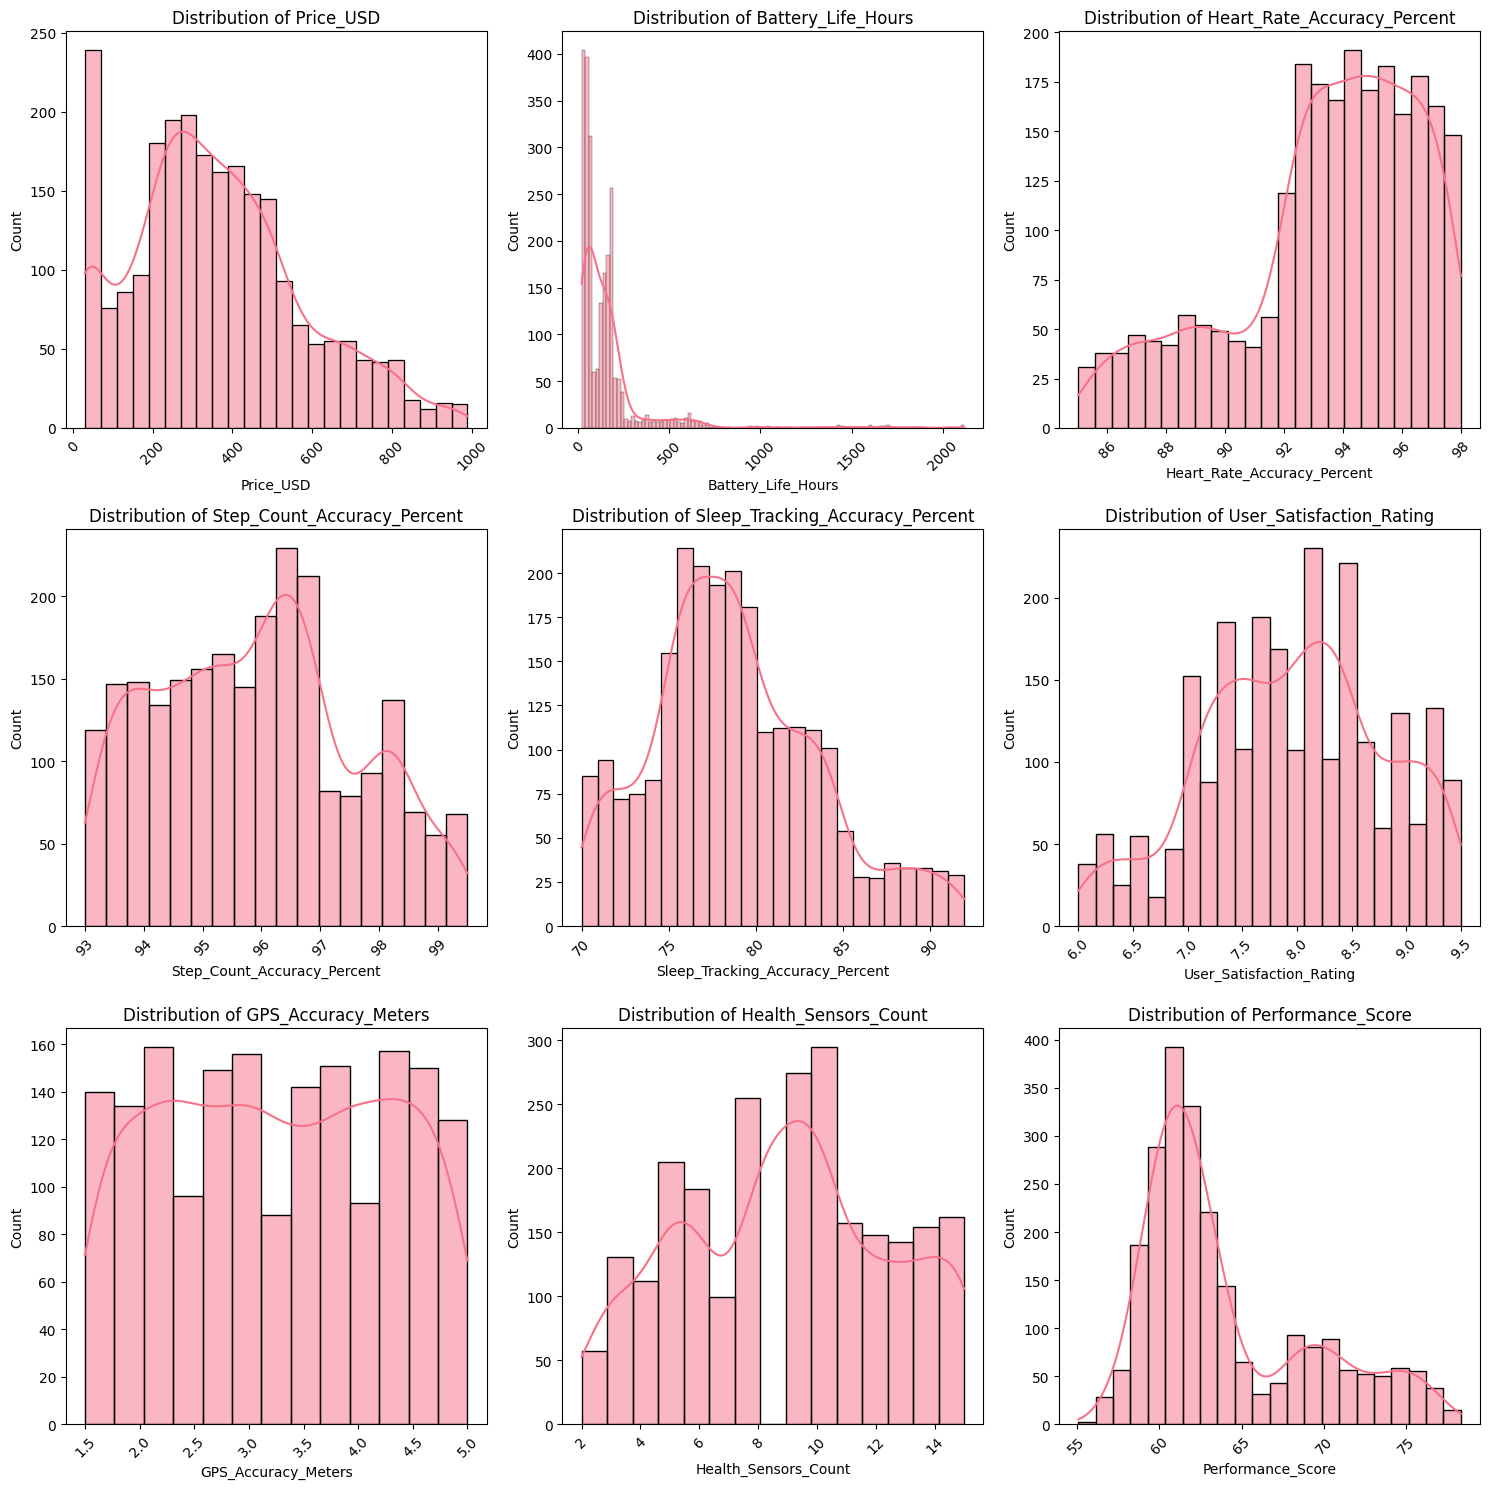

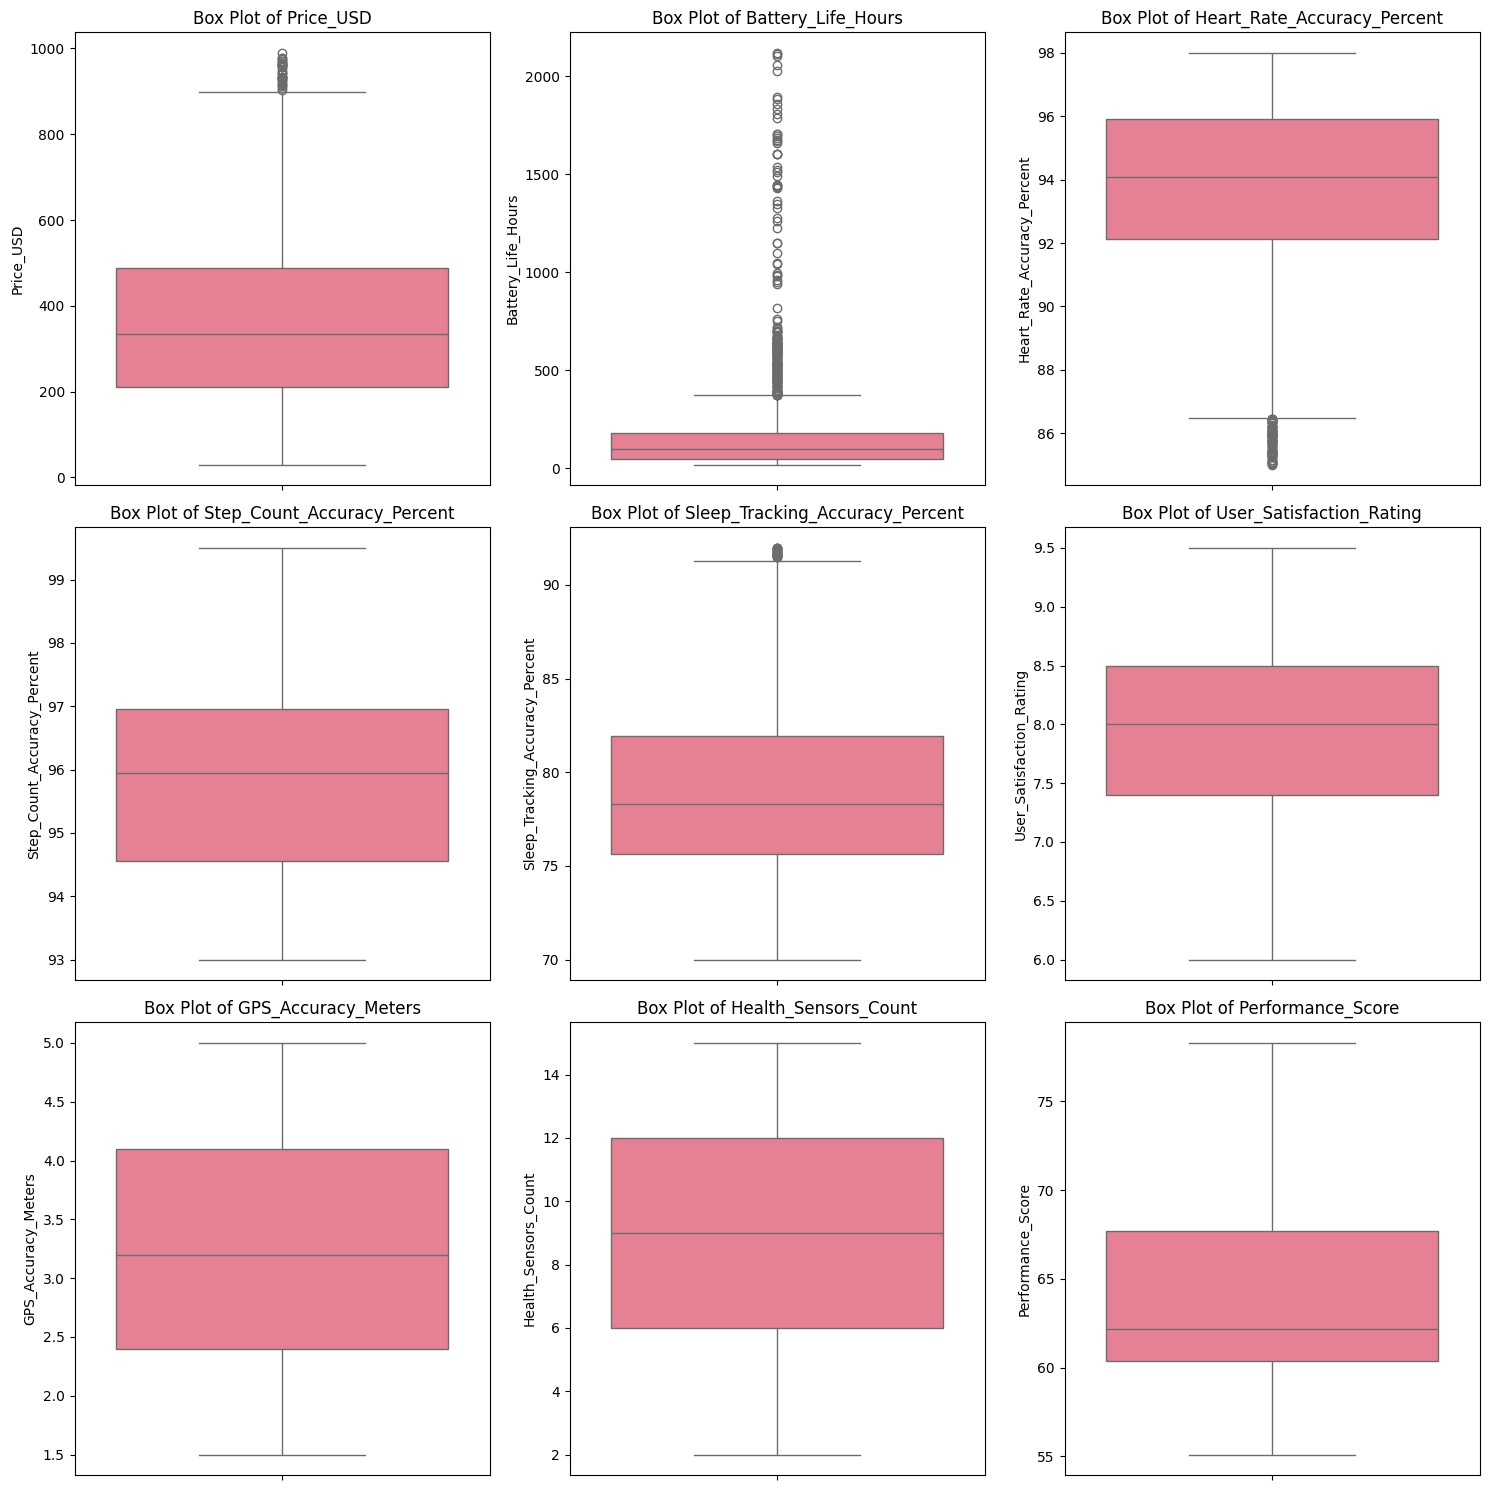


Value counts for Test_Date:
Test_Date
2025-06-21    121
2025-06-15    105
2025-06-02    104
2025-06-13    103
2025-06-18    103
2025-06-04    101
2025-06-05    101
2025-06-25     99
2025-06-23     97
2025-06-24     97
2025-06-17     96
2025-06-08     96
2025-06-22     96
2025-06-11     95
2025-06-10     94
2025-06-20     93
2025-06-14     92
2025-06-06     91
2025-06-19     91
2025-06-03     89
2025-06-07     86
2025-06-12     85
2025-06-09     81
2025-06-01     81
2025-06-16     78
Name: count, dtype: int64
Too many categories (25) to plot effectively.

Value counts for Device_Name:
Device_Name
WHOOP 4.0                     231
Oura Ring Gen 4               231
Polar Vantage V3              127
Polar Pacer Pro               118
Withings ScanWatch 2          114
Samsung Galaxy Watch FE        98
Withings Steel HR              98
Apple Watch SE 3               92
Apple Watch Series 10          92
Samsung Galaxy Watch Ultra     91
Samsung Galaxy Watch 7         74
Apple Watch Ultra 2   

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

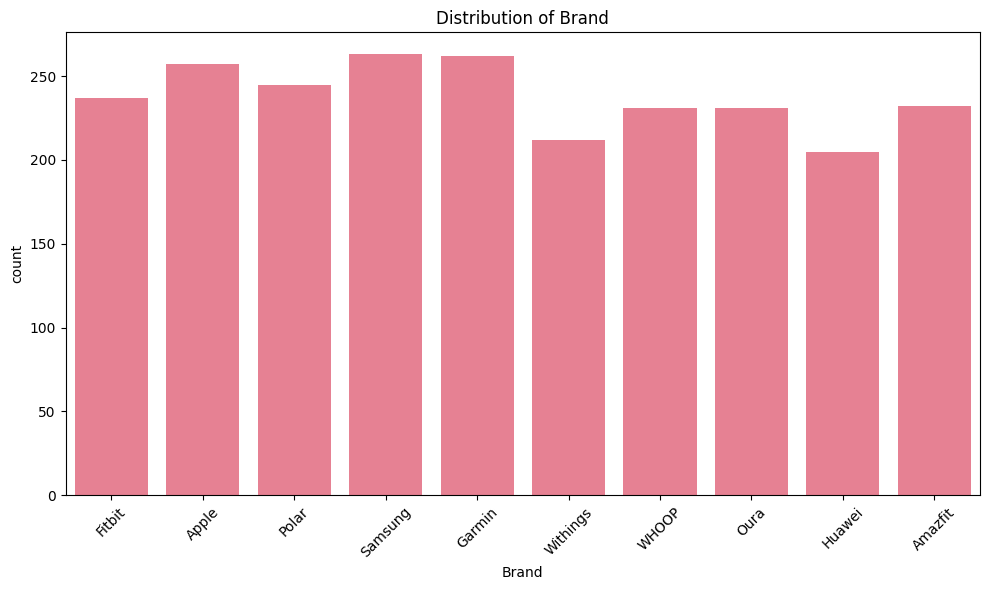


Value counts for Model:
Model
4.0                   231
Ring Gen 4            231
Vantage V3            127
Pacer Pro             118
ScanWatch 2           114
Galaxy Watch FE        98
Steel HR               98
Watch SE 3             92
Watch Series 10        92
Galaxy Watch Ultra     91
Galaxy Watch 7         74
Watch Ultra 2          73
GTR 4                  63
Sense 2                61
Charge 6               60
Versa 4                60
GTS 4                  58
Band 9                 58
T-Rex 3                57
Inspire 4              56
Instinct 2X            56
Watch GT 5             56
Band 7                 54
Forerunner 965         54
Venu 3                 53
Enduro 3               50
Fenix 8                49
Watch Ultimate         46
Watch 5                45
Name: count, dtype: int64
Too many categories (29) to plot effectively.

Value counts for Category:
Category
Smartwatch         1230
Sports Watch        513
Fitness Band        231
Smart Ring          231
Fitness Tr

<Figure size 1000x600 with 0 Axes>

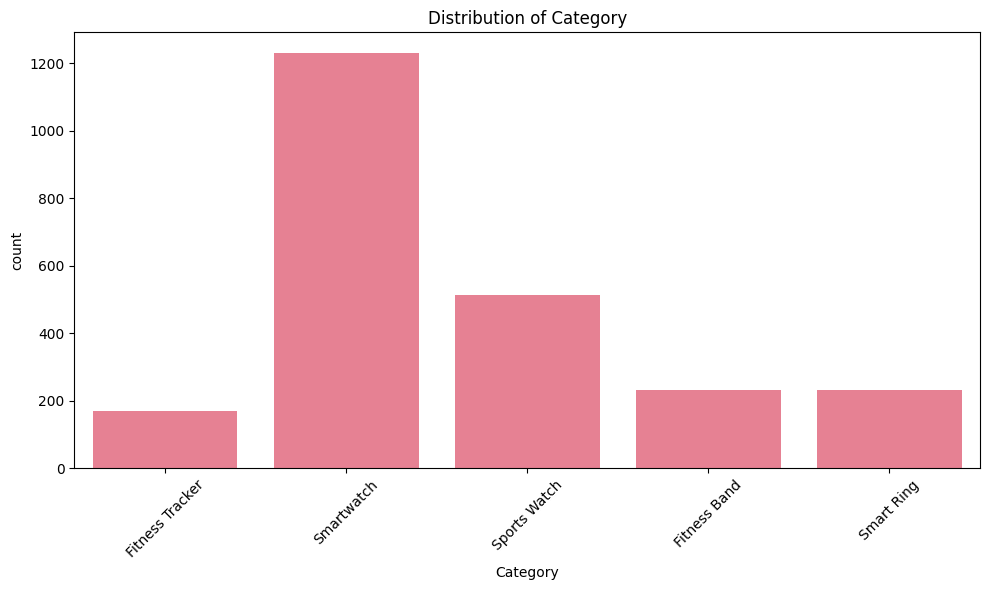


Value counts for Water_Resistance_Rating:
Water_Resistance_Rating
IPX8     649
5ATM     583
IP68     565
IPX7     256
IPX4     158
3ATM     117
10ATM     47
Name: count, dtype: int64


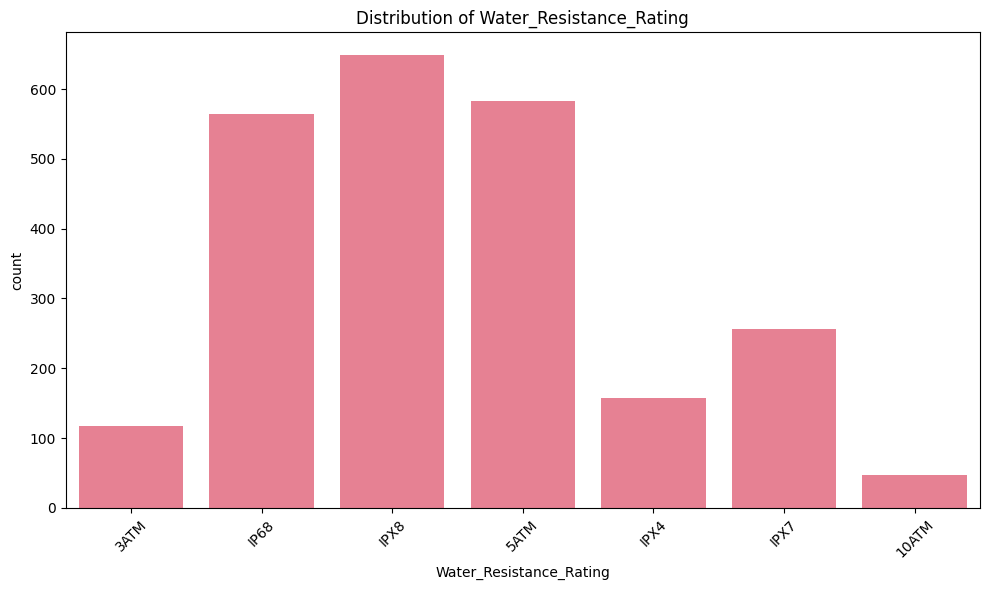


Value counts for Connectivity_Features:
Connectivity_Features
Bluetooth                    906
WiFi, Bluetooth, NFC, LTE    617
WiFi, Bluetooth, NFC         613
Bluetooth, WiFi              239
Name: count, dtype: int64


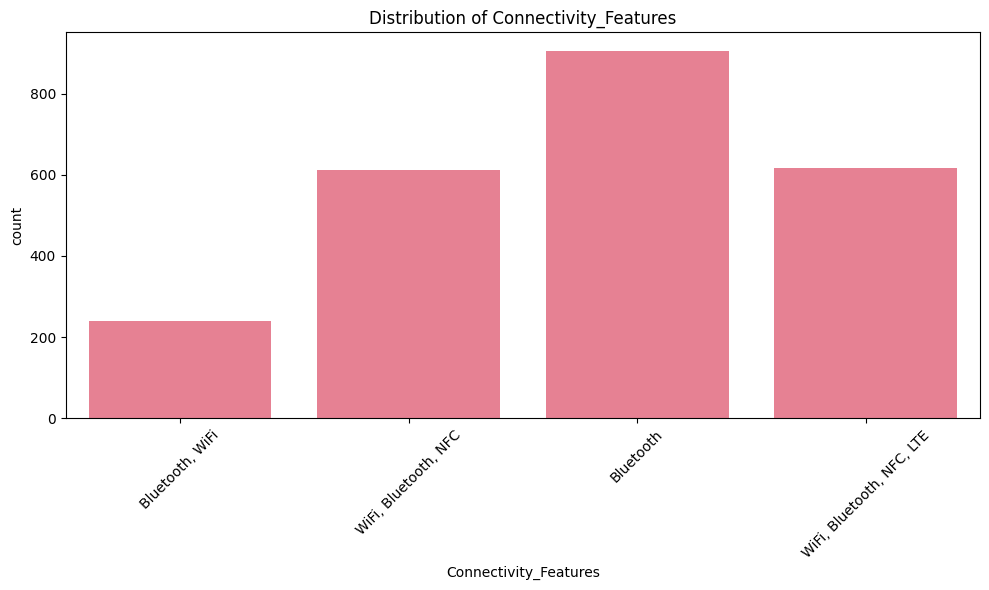


Value counts for App_Ecosystem_Support:
App_Ecosystem_Support
Cross-platform    1305
Android/iOS        813
iOS                257
Name: count, dtype: int64


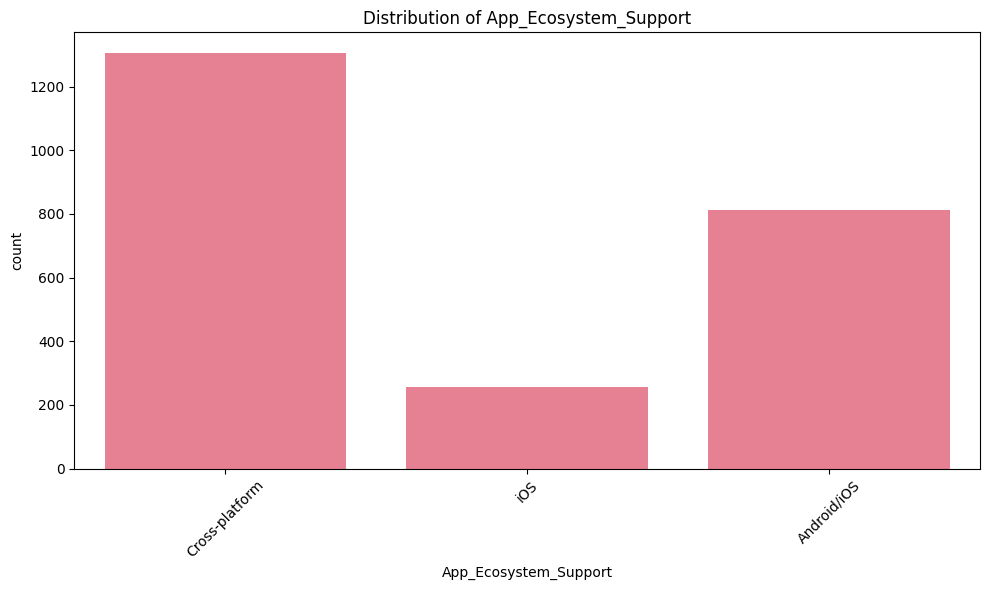


CORRELATION ANALYSIS


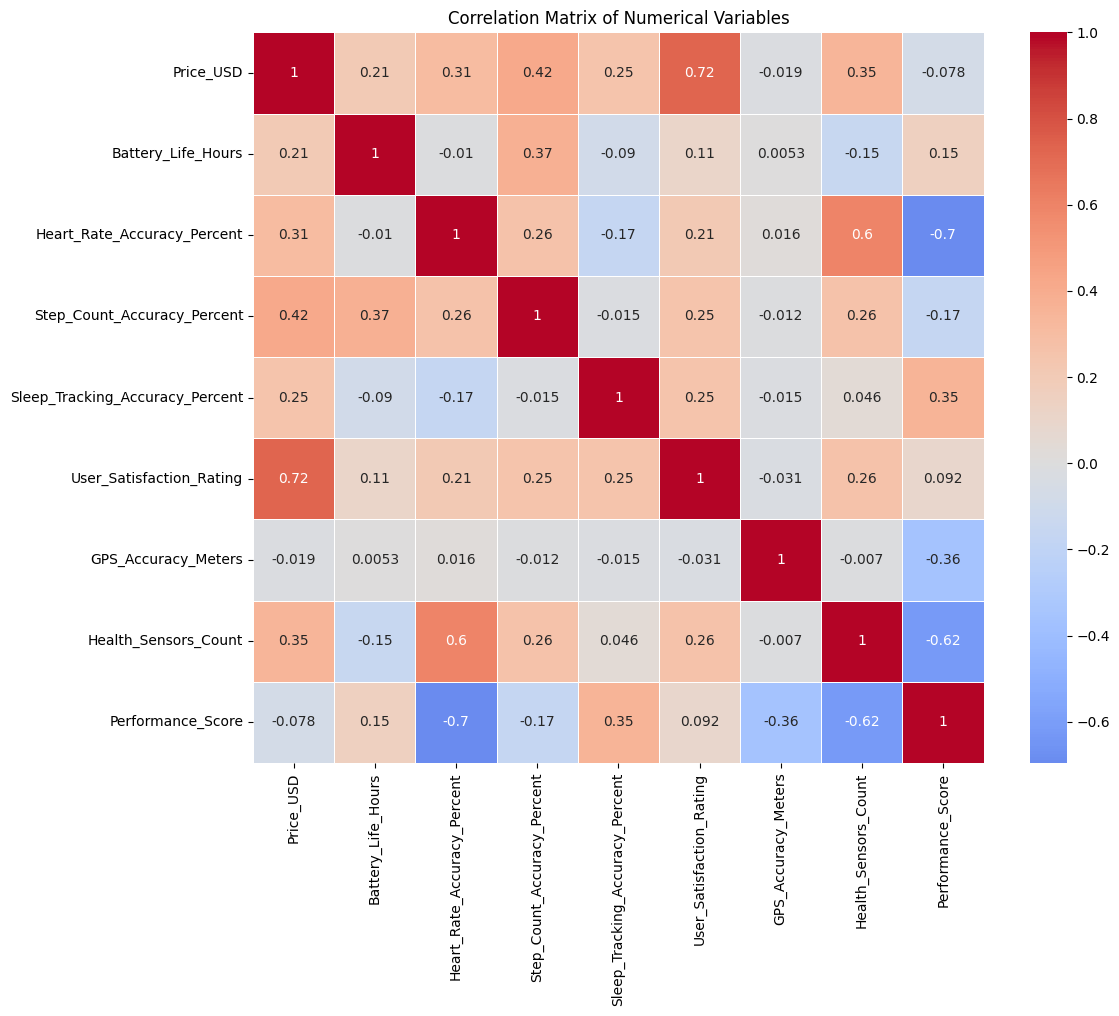


Highly correlated pairs (|correlation| > 0.7):
Price_USD - User_Satisfaction_Rating: 0.724

OUTLIER DETECTION
Outlier summary:


,Column,Outlier Count,Outlier Percentage,Lower Bound,Upper Bound
0,Price_USD,33,1.389474,-202.2075,902.0125
1,Battery_Life_Hours,199,8.378947,-148.8500,373.1500
2,Heart_Rate_Accuracy_Percent,87,3.663158,86.4625,101.6025
3,Step_Count_Accuracy_Percent,0,0.000000,90.9350,100.5750
4,Sleep_Tracking_Accuracy_Percent,21,0.884211,66.1300,91.4100
5,User_Satisfaction_Rating,0,0.000000,5.7500,10.1500
6,GPS_Accuracy_Meters,0,0.000000,-0.1500,6.6500
7,Health_Sensors_Count,0,0.000000,-3.0000,21.0000
8,Performance_Score,0,0.000000,49.4500,78.6500



DATA QUALITY ASSESSMENT

Duplicate rows: 0 (0.00%)

✅ No constant columns found.

Unique values per column:


,Column,Unique Values
0,Price_USD,2111
1,Battery_Life_Hours,1436
2,Sleep_Tracking_Accuracy_Percent,1291
3,Heart_Rate_Accuracy_Percent,952
4,Step_Count_Accuracy_Percent,621
5,Performance_Score,218
6,User_Satisfaction_Rating,36
7,GPS_Accuracy_Meters,36
8,Model,29
9,Device_Name,29



EDA COMPLETE!


In [55]:
# Comprehensive Exploratory Data Analysis (EDA)

# Basic Dataset Information
print("\n" + "="*50)
print("BASIC DATASET INFORMATION")
print("="*50)

print(f"\nDataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")

print("\nColumn Names and Data Types:")
print(df.dtypes)

print("\nFirst 5 rows:")
display(df.head())

print("\nLast 5 rows:")
display(df.tail())

print("\nDataset Info:")
df.info()

# Missing Values Analysis
print("\n" + "="*50)
print("MISSING VALUES ANALYSIS")
print("="*50)

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)

print("Missing values summary:")
display(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("✅ No missing values found in the dataset!")

# Statistical Summary
print("\n" + "="*50)
print("STATISTICAL SUMMARY")
print("="*50)

print("\nDescriptive statistics for numerical columns:")
display(df.describe())

print("\nDescriptive statistics for categorical columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    display(df[categorical_cols].describe())
else:
    print("No categorical columns found.")

# Data Distribution Analysis
print("\n" + "="*50)
print("DATA DISTRIBUTION ANALYSIS")
print("="*50)

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

# Visualizations
plt.style.use('default')
sns.set_palette("husl")

# 1. Distribution of numerical variables
if len(numerical_cols) > 0:
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            sns.histplot(data=df, x=col, kde=True, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}')
            axes[i].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# 2. Box plots for numerical variables
if len(numerical_cols) > 0:
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            sns.boxplot(data=df, y=col, ax=axes[i])
            axes[i].set_title(f'Box Plot of {col}')
    
    # Hide empty subplots
    for i in range(len(numerical_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# 3. Categorical variables analysis
if len(categorical_cols) > 0:
    for col in categorical_cols:
        print(f"\nValue counts for {col}:")
        value_counts = df[col].value_counts()
        print(value_counts)
        
        # Plot categorical distribution
        plt.figure(figsize=(10, 6))
        if len(value_counts) <= 20:  # Only plot if not too many categories
            sns.countplot(data=df, x=col)
            plt.title(f'Distribution of {col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            print(f"Too many categories ({len(value_counts)}) to plot effectively.")

# 4. Correlation Analysis
print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)

if len(numerical_cols) > 1:
    correlation_matrix = df[numerical_cols].corr()
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Variables')
    plt.tight_layout()
    plt.show()
    
    # Find highly correlated pairs
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:  # High correlation threshold
                high_corr_pairs.append((
                    correlation_matrix.columns[i], 
                    correlation_matrix.columns[j], 
                    corr_val
                ))
    
    if high_corr_pairs:
        print("\nHighly correlated pairs (|correlation| > 0.7):")
        for var1, var2, corr in high_corr_pairs:
            print(f"{var1} - {var2}: {corr:.3f}")
    else:
        print("\nNo highly correlated pairs found (|correlation| > 0.7)")

# 5. Outlier Detection
print("\n" + "="*50)
print("OUTLIER DETECTION")
print("="*50)

if len(numerical_cols) > 0:
    outlier_summary = []
    
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100
        
        outlier_summary.append({
            'Column': col,
            'Outlier Count': outlier_count,
            'Outlier Percentage': outlier_percentage,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound
        })
    
    outlier_df = pd.DataFrame(outlier_summary)
    print("Outlier summary:")
    display(outlier_df)

# 6. Data Quality Assessment
print("\n" + "="*50)
print("DATA QUALITY ASSESSMENT")
print("="*50)

# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicate_count} ({(duplicate_count/len(df)*100):.2f}%)")

# Check for constant columns
constant_cols = [col for col in df.columns if df[col].nunique() <= 1]
if constant_cols:
    print(f"\nConstant columns (single unique value): {constant_cols}")
else:
    print("\n✅ No constant columns found.")

# Unique values per column
print("\nUnique values per column:")
unique_counts = df.nunique().sort_values(ascending=False)
display(pd.DataFrame({'Column': unique_counts.index, 'Unique Values': unique_counts.values}))

print("\n" + "="*50)
print("EDA COMPLETE!")
print("="*50)